In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import scipy.interpolate as interp
import pandas as pd
from helpers import *

np.random.seed(1)

In [2]:
def simulate_auctions(v, max_b, r, n, eps):
    mean_first, mean_second, mean_all = [], [], []
    for N in range(2,n): 

        b_mean = bet_Bayes_Nash_all(N, v)
        b_variance = produce_variance(b_mean, max_b)
        b =  negative_to_zero(bet_normal(b_mean,eps*b_variance), 1)
        auctioneer_utility = [sum(bi) for bi in b]
        winner_index=np.argmax(b, axis=1)
        winner_utility = v[np.arange(r), winner_index] - b[np.arange(r), winner_index]
        Welf = v[np.arange(r), winner_index]
        Opt =v.max(axis = 1)
        PoA = Welf/Opt
        mean_all.append(np.mean(PoA))
    for N in range(2,n): 

        b_mean = bet_Bayes_Nash_second(N, v)
        b_variance = produce_variance(b_mean, v)
        b =  negative_to_zero(bet_normal(b_mean,eps*b_variance), 1)
    
        sorted_b = np.sort(b, axis=1)[:, ::-1]
        auctioneer_utility = [sum(bi) for bi in b]
        winner_index=np.argmax(b, axis=1)
        winner_utility = v[np.arange(r), winner_index] - np.partition(sorted_b, -2, axis=1)[:, -2]
        Welf = v[np.arange(r), winner_index]
        Opt =v.max(axis = 1)
        PoA = Welf/Opt
        mean_second.append(np.mean(PoA))
    for N in range(1,n): 

        b_mean = bet_Bayes_Nash(N, v)
        b_variance = produce_variance(b_mean, v)
        b =  negative_to_zero(bet_normal(b_mean,eps*b_variance), 1)
        winner=np.argmax(b, axis=0)
        Welf = v[winner, np.arange(r)]
        Opt =v.max(axis = 0)
        PoA = Welf/Opt
        mean_first.append(np.mean(PoA))
    return mean_first, mean_second, mean_all

In [3]:
def simulate_auctions_uniform(r, n, v):
    mean_first, mean_second, mean_all = [], [], []
    for N in range(2,n): 

        b =  bet_random(v)
        auctioneer_utility = [sum(bi) for bi in b]
        winner_index=np.argmax(b, axis=1)
        winner_utility = v[np.arange(r), winner_index] - b[np.arange(r), winner_index]
        Welf = v[np.arange(r), winner_index]
        Opt =v.max(axis = 1)
        PoA = Welf/Opt
        mean_all.append(np.mean(PoA))
    for N in range(2,n): 

        b = bet_random(v)
        sorted_b = np.sort(b, axis=1)[:, ::-1]
    
        auctioneer_utility = [sum(bi) for bi in b]
        winner_index=np.argmax(b, axis=1)
        winner_utility = v[np.arange(r), winner_index] - np.partition(sorted_b, -2, axis=1)[:, -2]
        Welf = v[np.arange(r), winner_index]
        Opt =v.max(axis = 1)
        PoA = Welf/Opt
        mean_second.append(np.mean(PoA))
    for N in range(1,n): 
        b = bet_random(v)
        winner=np.argmax(b, axis=0)
        Welf = v[winner, np.arange(r)]
        Opt =v.max(axis = 0)
        PoA = Welf/Opt
        mean_first.append(np.mean(PoA))
    return mean_first, mean_second, mean_all

In [ ]:
v = np.random.uniform(0,1,(N,r))


### Z overbettingiem

In [4]:
Amean_first, Amean_second, Amean_all = simulate_auctions(v, 1, 10000, 100, 1)

In [5]:
Bmean_first, Bmean_second, Bmean_all = simulate_auctions(v, 1, 10000, 100, 2)

In [6]:
Cmean_first, Cmean_second, Cmean_all = simulate_auctions(v, 1, 10000, 100, 3)

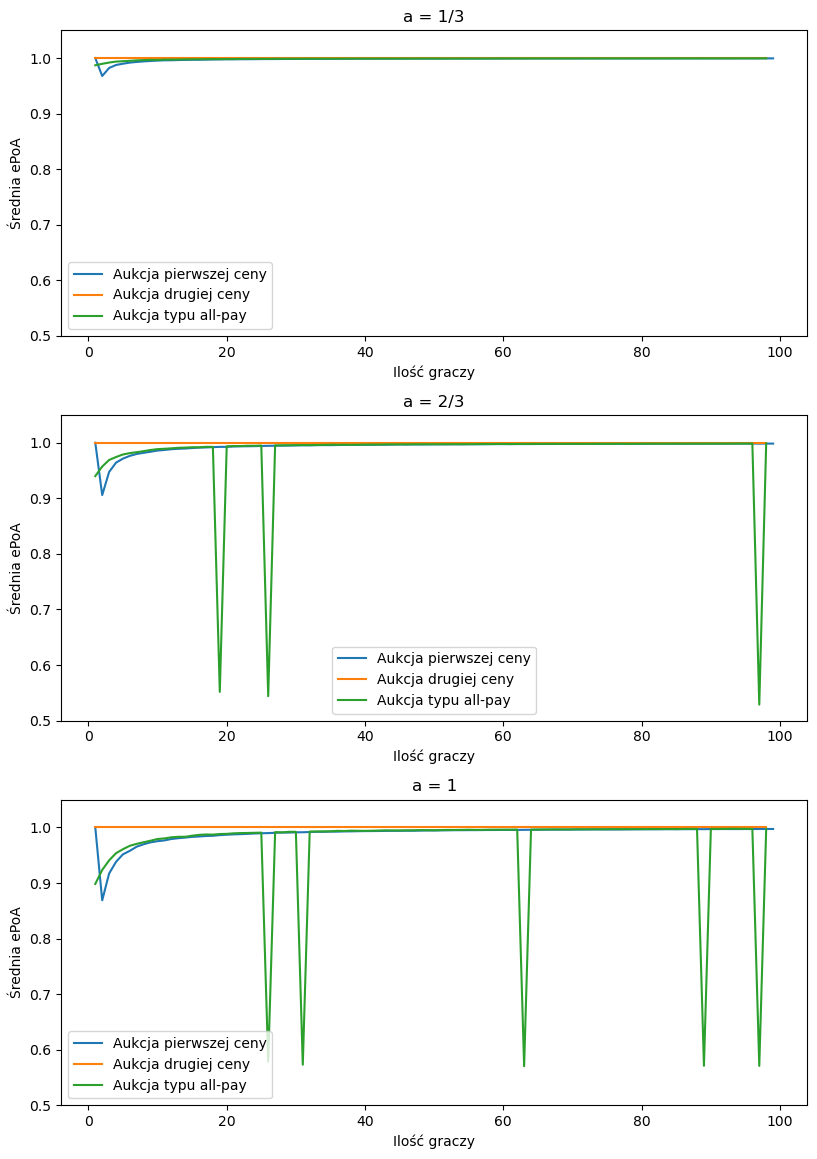

In [7]:
plt.figure(figsize=(8.27, 11.69))

ax1 = plt.subplot(3, 1, 1)
ax1.plot(range(1, len(Amean_first) + 1), Amean_first, label='Aukcja pierwszej ceny')
ax1.plot(range(1, len(Amean_second) + 1), Amean_second, label='Aukcja drugiej ceny')
ax1.plot(range(1, len(Amean_all) + 1), Amean_all, label='Aukcja typu all-pay')
ax1.title.set_text('a = 1/3')
ax1.legend(loc = 'lower left')
plt.xlabel('Ilość graczy')
plt.ylabel('Średnia ePoA')
ax1.set_ylim([0.5, 1.05])
plt.legend()

ax2 =plt.subplot(3, 1, 2)
ax2.plot(range(1, len(Bmean_first) + 1), Bmean_first, label='Aukcja pierwszej ceny')
ax2.plot(range(1, len(Bmean_second) + 1), Bmean_second, label='Aukcja drugiej ceny')
ax2.plot(range(1, len(Bmean_all) + 1), Bmean_all, label='Aukcja typu all-pay')
ax2.title.set_text('a = 2/3')
ax2.legend(loc = 'lower left')
plt.xlabel('Ilość graczy')
plt.ylabel('Średnia ePoA')
ax2.set_ylim([0.5, 1.05])
plt.legend()

ax3 = plt.subplot(3, 1, 3)
ax3.plot(range(1, len(Cmean_first) + 1), Cmean_first, label='Aukcja pierwszej ceny')
ax3.plot(range(1, len(Cmean_second) + 1), Cmean_second, label='Aukcja drugiej ceny')
ax3.plot(range(1, len(Cmean_all) + 1), Cmean_all, label='Aukcja typu all-pay')
ax3.title.set_text('a = 1')
ax3.legend(loc = 'lower left')
ax3.set_ylim([0.5, 1.05])
plt.xlabel('Ilość graczy')
plt.ylabel('Średnia ePoA')

plt.tight_layout()

plt.savefig('pictures/overbetting/comparison.png')
plt.tight_layout()
plt.show()



In [8]:
Amean_first, Amean_second, Amean_all = simulate_auctions(v, 1, 10000, 100, 1)

In [9]:
Bmean_first, Bmean_second, Bmean_all = simulate_auctions(v, 1, 10000, 100, 3/4)

In [10]:
Cmean_first, Cmean_second, Cmean_all = simulate_auctions(v, 1, 10000, 100, 3/5)


KeyboardInterrupt



In [ ]:
plt.figure(figsize=(8.27, 11.69))

ax1 = plt.subplot(3, 1, 1)
ax1.plot(range(1, len(Amean_first) + 1), Amean_first, label='Aukcja pierwszej ceny')
ax1.plot(range(1, len(Amean_second) + 1), Amean_second, label='Aukcja drugiej ceny')
ax1.plot(range(1, len(Amean_all) + 1), Amean_all, label='Aukcja typu all-pay')
ax1.title.set_text('a = 1/3')
plt.xlabel('Ilość graczy')
plt.ylabel('Średnia ePoA')
ax1.set_ylim([0.5, 1.05])
plt.legend()

ax2 =plt.subplot(3, 1, 2)
ax2.plot(range(1, len(Bmean_first) + 1), Bmean_first, label='Aukcja pierwszej ceny')
ax2.plot(range(1, len(Bmean_second) + 1), Bmean_second, label='Aukcja drugiej ceny')
ax2.plot(range(1, len(Bmean_all) + 1), Bmean_all, label='Aukcja typu all-pay')
ax2.title.set_text('a = 1/4')
#plt.legend(loc = 'lower right')
plt.xlabel('Ilość graczy')
plt.ylabel('Średnia ePoA')
ax2.set_ylim([0.5, 1.05])
plt.legend()

ax3 = plt.subplot(3, 1, 3)
ax3.plot(range(1, len(Cmean_first) + 1), Cmean_first, label='Aukcja pierwszej ceny')
ax3.plot(range(1, len(Cmean_second) + 1), Cmean_second, label='Aukcja drugiej ceny')
ax3.plot(range(1, len(Cmean_all) + 1), Cmean_all, label='Aukcja typu all-pay')
ax3.title.set_text('a = 1/5')
ax3.set_ylim([0.5, 1.05])
plt.xlabel('Ilość graczy')
plt.ylabel('Średnia ePoA')

plt.tight_layout()

plt.legend()
plt.savefig('pictures/overbetting/comparison2.png')
plt.tight_layout()
plt.show()


### Bez overbettingu

In [ ]:
Amean_first, Amean_second, Amean_all = simulate_auctions(v, v, 10000, 100, 1)

In [ ]:
Bmean_first, Bmean_second, Bmean_all = simulate_auctions(v, v, 10000, 100, 2)

In [ ]:
Cmean_first, Cmean_second, Cmean_all = simulate_auctions(v, v, 10000, 100, 3)

In [ ]:
plt.figure(figsize=(8.27, 11.69))

ax1 = plt.subplot(3, 1, 1)
ax1.plot(range(1, len(Amean_first) + 1), Amean_first, label='Aukcja pierwszej ceny')
ax1.plot(range(1, len(Amean_second) + 1), Amean_second, label='Aukcja drugiej ceny')
ax1.plot(range(1, len(Amean_all) + 1), Amean_all, label='Aukcja typu all-pay')
ax1.title.set_text('a = 1/3')
ax1.legend(loc = 'lower left')
plt.xlabel('Ilość graczy')
plt.ylabel('Średnia ePoA')
ax1.set_ylim([0.5, 1.05])
plt.legend()

ax2 =plt.subplot(3, 1, 2)
ax2.plot(range(1, len(Bmean_first) + 1), Bmean_first, label='Aukcja pierwszej ceny')
ax2.plot(range(1, len(Bmean_second) + 1), Bmean_second, label='Aukcja drugiej ceny')
ax2.plot(range(1, len(Bmean_all) + 1), Bmean_all, label='Aukcja typu all-pay')
ax2.title.set_text('a = 2/3')
ax2.legend(loc = 'lower left')
plt.xlabel('Ilość graczy')
plt.ylabel('Średnia ePoA')
ax2.set_ylim([0.5, 1.05])
plt.legend()

ax3 = plt.subplot(3, 1, 3)
ax3.plot(range(1, len(Cmean_first) + 1), Cmean_first, label='Aukcja pierwszej ceny')
ax3.plot(range(1, len(Cmean_second) + 1), Cmean_second, label='Aukcja drugiej ceny')
ax3.plot(range(1, len(Cmean_all) + 1), Cmean_all, label='Aukcja typu all-pay')
ax3.title.set_text('a = 1')
ax3.legend(loc = 'lower left')
ax3.set_ylim([0.5, 1.05])
plt.xlabel('Ilość graczy')
plt.ylabel('Średnia ePoA')

plt.tight_layout()

plt.savefig('pictures/no_overbetting/comparison.png')
plt.tight_layout()
plt.show()

In [ ]:
Amean_first, Amean_second, Amean_all = simulate_auctions(v, v, 10000, 100, 1)

In [ ]:
Bmean_first, Bmean_second, Bmean_all = simulate_auctions(v, v, 10000, 100, 3/4)

In [ ]:
Cmean_first, Cmean_second, Cmean_all = simulate_auctions(v, v, 10000, 100, 3/5)

In [ ]:
plt.figure(figsize=(8.27, 11.69))

ax1 = plt.subplot(3, 1, 1)
ax1.plot(range(1, len(Amean_first) + 1), Amean_first, label='Aukcja pierwszej ceny')
ax1.plot(range(1, len(Amean_second) + 1), Amean_second, label='Aukcja drugiej ceny')
ax1.plot(range(1, len(Amean_all) + 1), Amean_all, label='Aukcja typu all-pay')
ax1.title.set_text('a = 1/3')
plt.xlabel('Ilość graczy')
plt.ylabel('Średnia ePoA')
ax1.set_ylim([0.5, 1.05])
plt.legend()

ax2 =plt.subplot(3, 1, 2)
ax2.plot(range(1, len(Bmean_first) + 1), Bmean_first, label='Aukcja pierwszej ceny')
ax2.plot(range(1, len(Bmean_second) + 1), Bmean_second, label='Aukcja drugiej ceny')
ax2.plot(range(1, len(Bmean_all) + 1), Bmean_all, label='Aukcja typu all-pay')
ax2.title.set_text('a = 1/4')
#plt.legend(loc = 'lower right')
plt.xlabel('Ilość graczy')
plt.ylabel('Średnia ePoA')
ax2.set_ylim([0.5, 1.05])
plt.legend()

ax3 = plt.subplot(3, 1, 3)
ax3.plot(range(1, len(Cmean_first) + 1), Cmean_first, label='Aukcja pierwszej ceny')
ax3.plot(range(1, len(Cmean_second) + 1), Cmean_second, label='Aukcja drugiej ceny')
ax3.plot(range(1, len(Cmean_all) + 1), Cmean_all, label='Aukcja typu all-pay')
ax3.title.set_text('a = 1/5')
ax3.set_ylim([0.5, 1.05])
plt.xlabel('Ilość graczy')
plt.ylabel('Średnia ePoA')

plt.tight_layout()

plt.legend()
plt.savefig('pictures/no_overbetting/comparison2.png')
plt.tight_layout()
plt.show()

### Dla rozkładu U(0,1)

In [ ]:
mean_first, mean_second, mean_all = simulate_auctions_uniform(10000, 100)

In [ ]:
plt.figure(figsize=(8.27, 6))
plt.plot(range(1, len(mean_first) + 1), mean_first, label='Aukcja pierwszej ceny')
plt.plot(range(1, len(mean_second) + 1), mean_second, label='Aukcja drugiej ceny')
plt.plot(range(1, len(mean_all) + 1), mean_all, label='Aukcja typu all-pay')
plt.xlabel('Ilość graczy')
plt.ylabel('Średnia ePoA')
plt.ylim(0.5, 1.05)
plt.legend()
plt.tight_layout()
plt.savefig('pictures/uniform/comparisonUniform.png')

plt.show()